<a href="https://colab.research.google.com/github/sandra-prl20/Project_ML/blob/main/FDS_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phishing Website Detection

*   Name   : Sandra Sabu
*   Rollno : 2022BCY0041
*   Project: Phishing Website detection
*   Guided by: Dr. Victer Paul



Objective

A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset . The performance level of each model is measures and compared.

In [ ]:
#Before that i have done feature extraction from the dataset.

This colab contains my feature extraction and data collection from open Source website Phish tank: https://colab.research.google.com/drive/16aHLEgzyZ971jJxD8H74yUe_Ngh1ncjF?usp=sharing

Load necessary libraries

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Link to dataset:https://drive.google.com/file/d/1CHof7oeM43iLOW0jOzk6FxLN4a2Srn1l/view?usp=sharing

In [ ]:
#Loading the data
data0 = pd.read_csv('/content/drive/MyDrive/ML/project_fDS_phishing/phishing.csv.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
data0.info()
#Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [ ]:
data0.describe() #statistical description

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
# Check for missing values
missing_values = data0.isnull().sum()
print("Missing values in each column:\n", missing_values)
data0.shape

Missing values in each column:
 Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64


(10000, 18)

In [ ]:
# Check for NaN values in the entire dataset
nan_values = data0.isna().sum()
print("NaN values in each column:\n", nan_values)

# Check if there are any NaN values in the entire dataset
if nan_values.sum() == 0:
    print("There are no NaN values in the dataset.")
else:
    print("There are NaN values in the dataset. Here is the count per column:")
    print(nan_values[nan_values > 0])


NaN values in each column:
 Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64
There are no NaN values in the dataset.


(10000, 18)

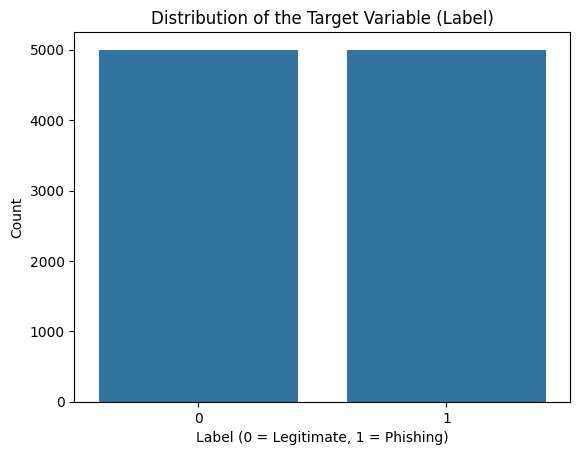

In [ ]:
# Count plot for the Label column
sns.countplot(x='Label', data=data0)
plt.title("Distribution of the Target Variable (Label)")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.show()

In [ ]:
from scipy import stats
# Only select numerical columns for outlier detection
numerical_cols = data0.select_dtypes(include=['int64']).columns
z_scores = np.abs(stats.zscore(data0[numerical_cols]))

# Define a threshold to identify outliers
threshold = 3
outliers = (z_scores > threshold)

# Count of outliers per column
outlier_counts = outliers.sum(axis=0)
print("Number of outliers per column:\n", outlier_counts)


Number of outliers per column:
 Have_IP           55
Have_At          226
URL_Length         0
URL_Depth        180
Redirection      135
https_Domain       2
TinyURL          903
Prefix/Suffix    932
DNS_Record         0
Web_Traffic        0
Domain_Age         0
Domain_End         0
iFrame           909
Mouse_Over       666
Right_Click        7
Web_Forwards       0
Label              0
dtype: int64


Number of outliers per column:
 Have_IP           55
Have_At          226
URL_Length         0
URL_Depth        180
Redirection      135
https_Domain       2
TinyURL          903
Prefix/Suffix    932
DNS_Record         0
Web_Traffic        0
Domain_Age         0
Domain_End         0
iFrame           909
Mouse_Over       666
Right_Click        7
Web_Forwards       0
Label              0
dtype: int64


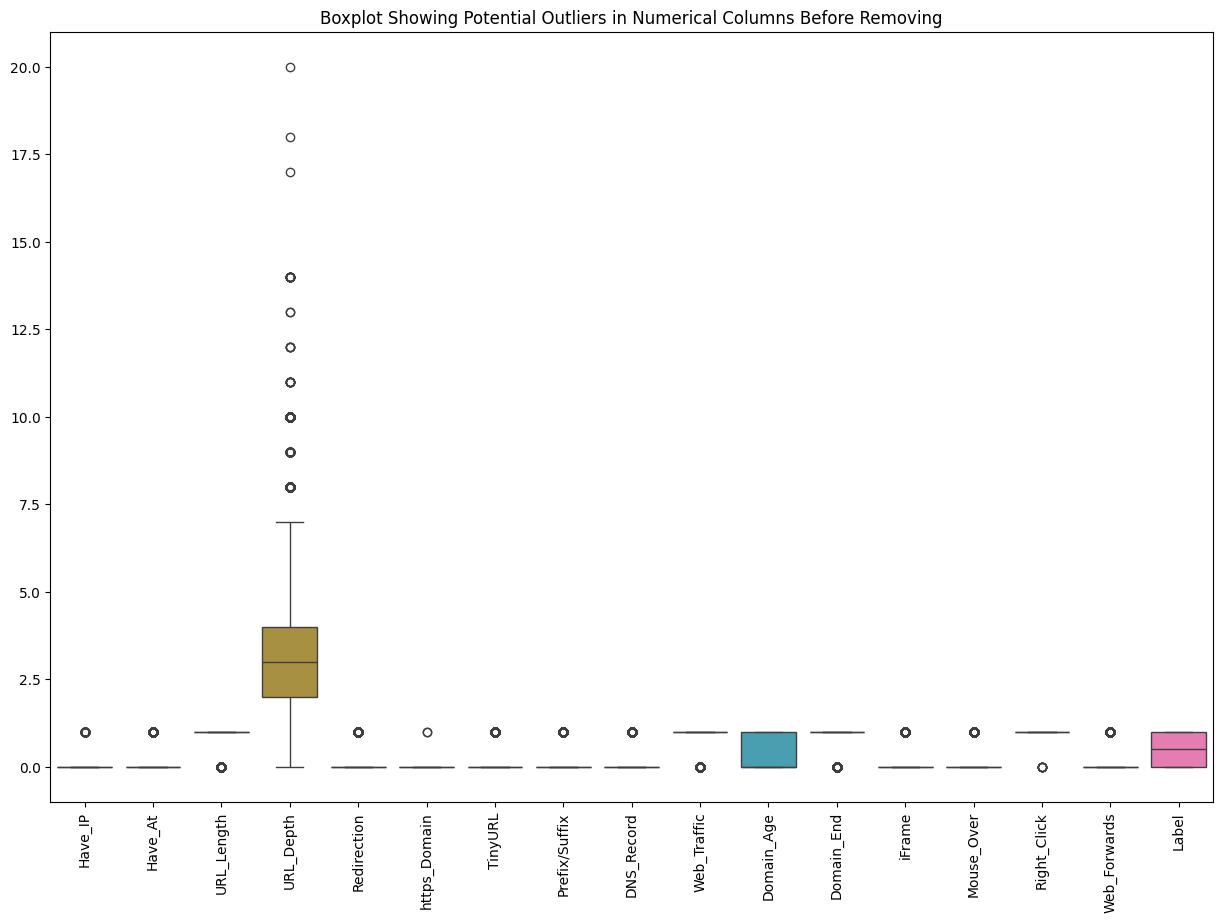

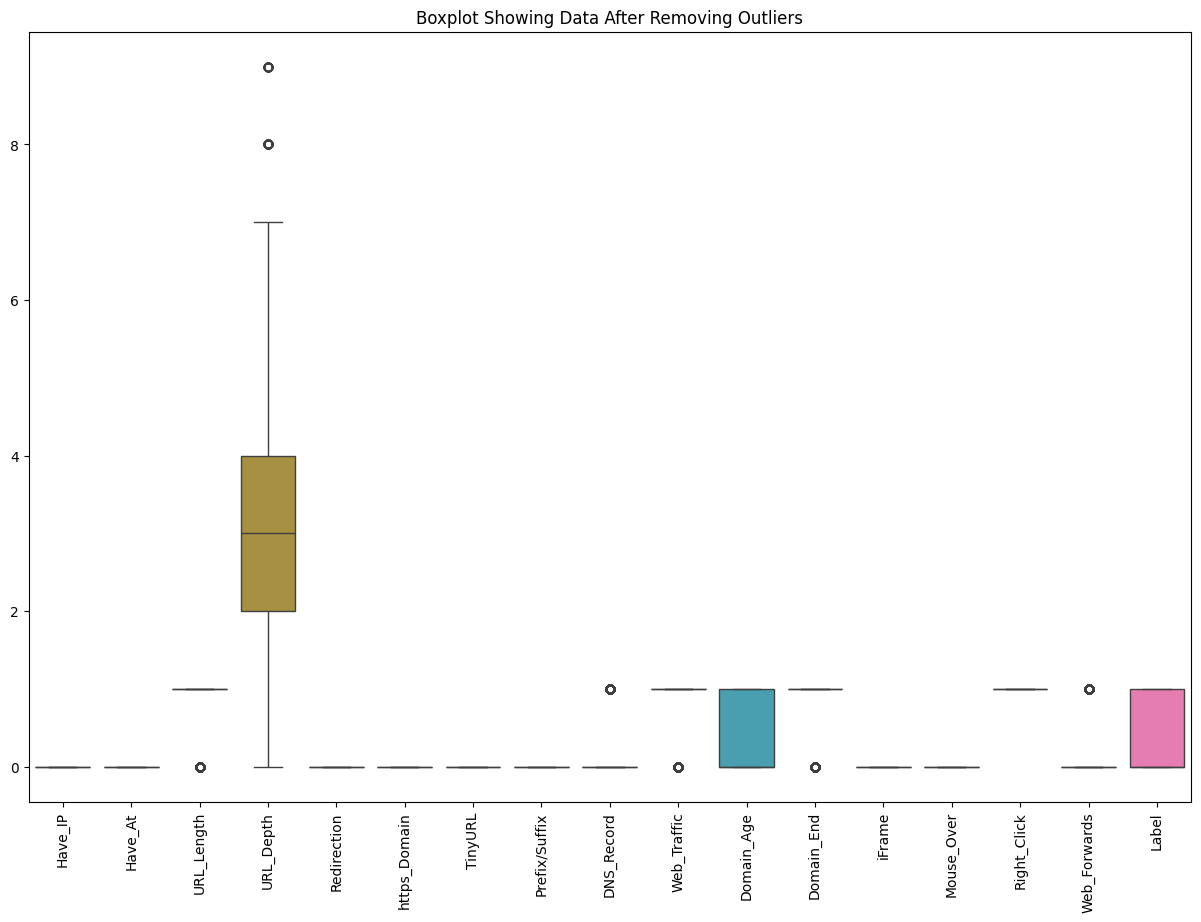

(10000, 18)

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Only select numerical columns for outlier detection
numerical_cols = data0.select_dtypes(include=['int64']).columns

# Calculate z-scores for numerical columns
z_scores = np.abs(stats.zscore(data0[numerical_cols]))

# Define a threshold to identify outliers
threshold = 3
outliers = (z_scores > threshold)

# Remove rows with outliers
data_no_outliers = data0[~np.any(outliers, axis=1)]

# Count of outliers per column
outlier_counts = outliers.sum(axis=0)
print("Number of outliers per column:\n", outlier_counts)

# Boxplot of data before removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data0[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplot Showing Potential Outliers in Numerical Columns Before Removing')
plt.show()

# Boxplot after removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_no_outliers[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplot Showing Data After Removing Outliers')
plt.show()


Visualizing the data

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

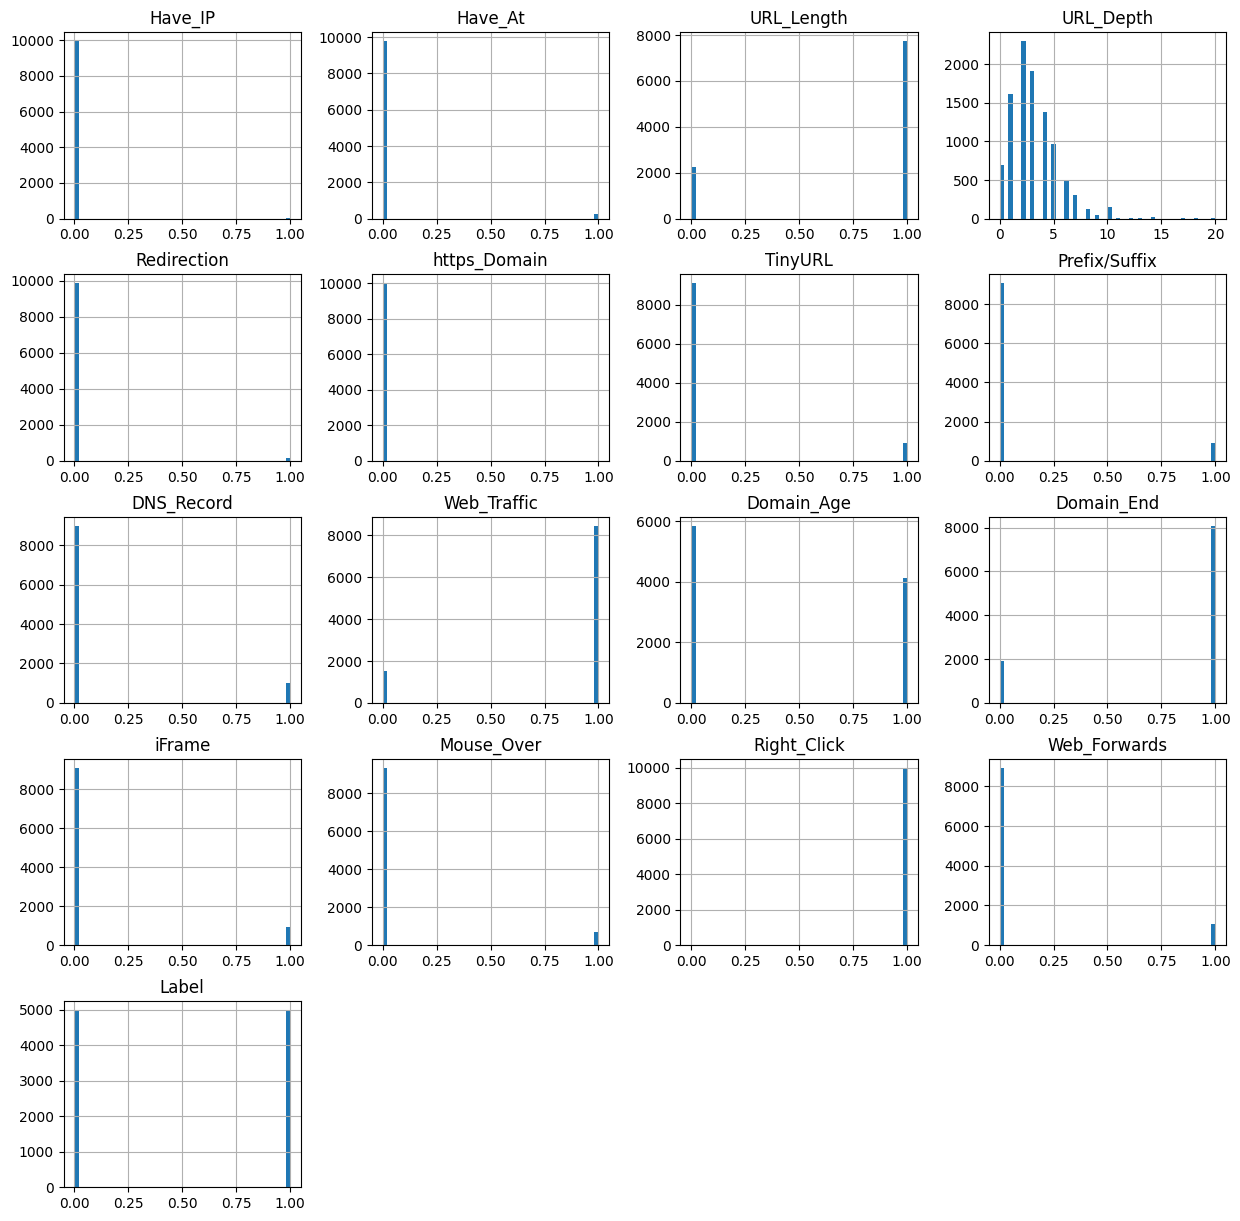

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

Non-numeric columns: Index(['Domain'], dtype='object')


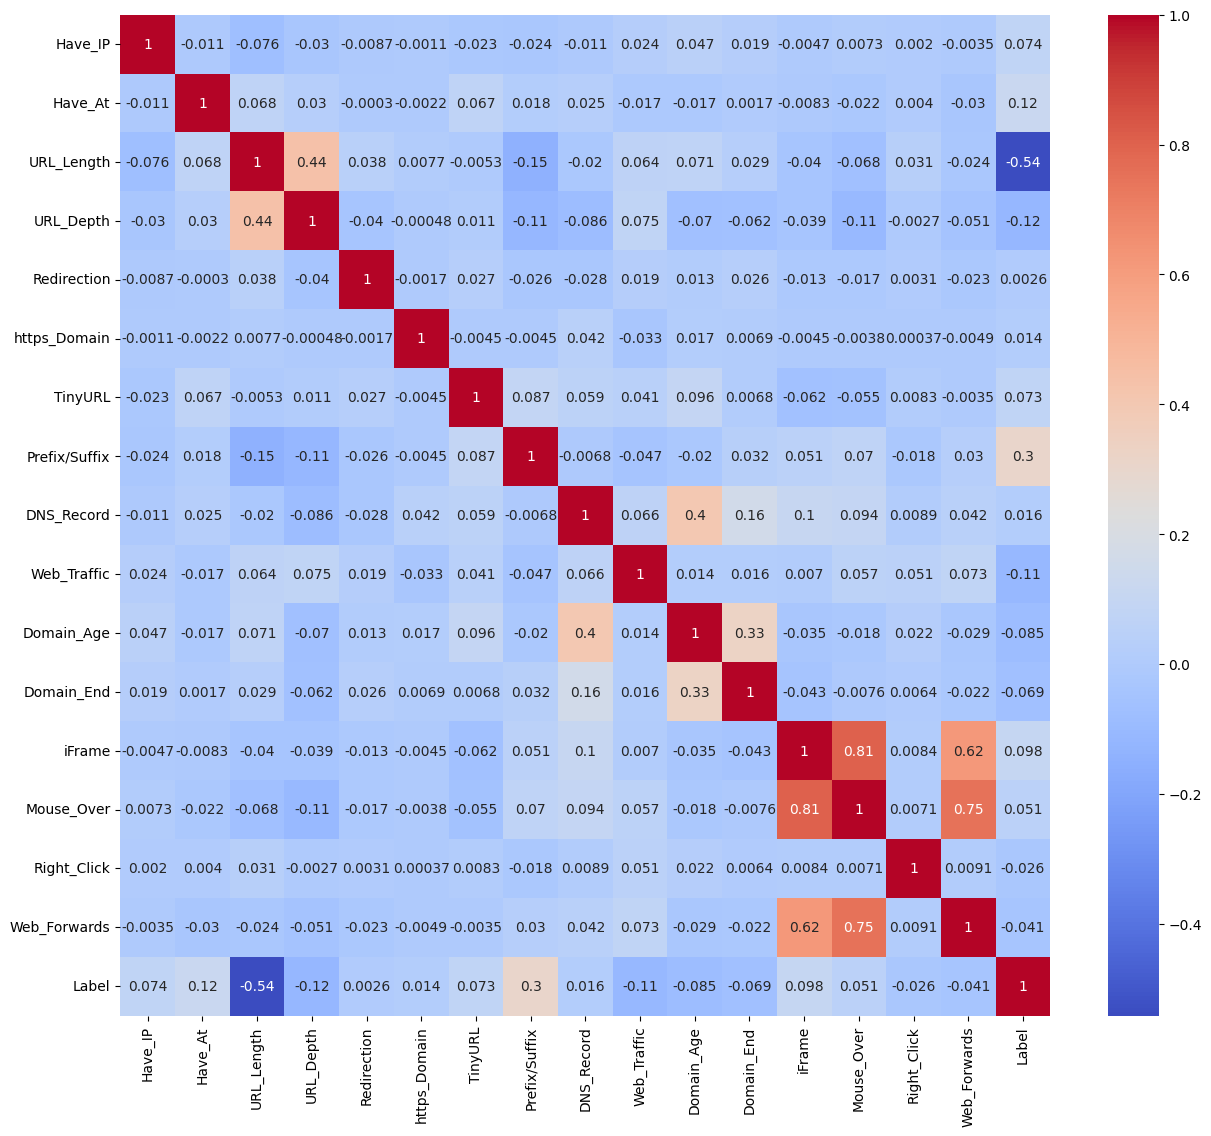

(10000, 18)

In [ ]:
non_numeric_cols = data0.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
# Drop non-numeric columns for correlation calculation
data_numeric = data0.drop(columns=non_numeric_cols)
plt.figure(figsize=(15, 13))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


Data Preprocessing & EDA Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.


In the feature extraction , the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()


(10000, 17)

Splitting the Data

In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
#standarization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exclude the 'Domain' column from X
X = data0.drop(columns=['Label', 'Domain'])
y = data0['Label']

# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check the shapes after scaling
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (7000, 16)
X_test shape: (3000, 16)


Machine Learning Models & Training : From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.
This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0).

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score


In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []


In [ ]:
#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))


Linear regression is a simple yet powerful statistical method for modeling the relationship between a dependent variable (target) and one or more independent variables (features)Linear Regression for Classification: Linear regression isn’t typically ideal for binary classification because it assumes a continuous outcome

In [ ]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Convert predictions to binary using a threshold of 0.5
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

# Calculate accuracy for both training and test sets
acc_train_linear = accuracy_score(y_train, y_train_pred_binary)
acc_test_linear = accuracy_score(y_test, y_test_pred_binary)

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_linear))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_linear))

Linear Regression: Accuracy on training Data: 0.799
Linear Regression: Accuracy on test Data: 0.799


Logistic Regression is a popular statistical model used for binary classification, where the outcome variable has two possible values.Logistic regression uses the sigmoid function to map any real-valued number to a value between 0 and 1

In [ ]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=12)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions
y_train_logistic_pred = log_reg.predict(X_train)
y_test_logistic_pred = log_reg.predict(X_test)

# Calculate accuracy for both training and test sets
acc_train_logistic = accuracy_score(y_train, y_train_logistic_pred)
acc_test_logistic = accuracy_score(y_test, y_test_logistic_pred)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_logistic))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_logistic))

Logistic Regression: Accuracy on training Data: 0.802
Logistic Regression: Accuracy on test Data: 0.803


In [ ]:

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with regularization (L2 is default)
log_reg = LogisticRegression(max_iter=1000)

# Perform Cross-Validation to get more reliable performance metrics
cross_val_score_mean = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-Validation Accuracy: {cross_val_score_mean:.3f}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller values = stronger regularization)
    'solver': ['liblinear', 'saga']  # Solvers to consider
}

# Grid Search for the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use the best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Fit the model on the training data
best_log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Calculate accuracy for both training and test sets
acc_train_logistic = accuracy_score(y_train, y_train_pred)
acc_test_logistic = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Logistic Regression: Accuracy on training Data: {acc_train_logistic:.3f}")
print(f"Logistic Regression: Accuracy on test Data: {acc_test_logistic:.3f}")

Cross-Validation Accuracy: 0.804
Best Hyperparameters: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression: Accuracy on training Data: 0.815
Logistic Regression: Accuracy on test Data: 0.805


Decision Tree Classifier Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
tree = DecisionTreeClassifier(max_depth=15, criterion='gini', random_state=42)

# Fit the model to the training data
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
# Get feature importance from the Decision Tree model
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Print feature importances
print("Feature Importances:\n", feature_importances)

# Select top n important features (for example, top 10)
top_features = feature_importances.head(10).index
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train the model again with selected features
tree.fit(X_train_selected, y_train)
y_train_tree = tree.predict(X_train_selected)
y_test_tree = tree.predict(X_test_selected)

# Calculate accuracy
from sklearn.metrics import accuracy_score
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print(f"Decision Tree: Accuracy on Training Data: {acc_train_tree:.3f}")
print(f"Decision Tree: Accuracy on Test Data: {acc_test_tree:.3f}")


Feature Importances:
 URL_Length       0.474297
URL_Depth        0.161342
Prefix/Suffix    0.138298
Have_At          0.035802
Web_Traffic      0.034229
iFrame           0.027401
TinyURL          0.026754
Domain_Age       0.025764
Web_Forwards     0.019601
Domain_End       0.019317
DNS_Record       0.012714
Redirection      0.011847
Mouse_Over       0.008136
Have_IP          0.003959
https_Domain     0.000538
Right_Click      0.000000
dtype: float64
Decision Tree: Accuracy on Training Data: 0.860
Decision Tree: Accuracy on Test Data: 0.848


Important Features: Based on the feature importances, the most critical features are:

URL_Length: 52.09%
Prefix/Suffix: 15.19%
URL_Depth: 14.81%
Other features like Have_At, Web_Traffic, and iFrame also contribute, but to a lesser extent.
Less Important Features: Features like https_Domain, Right_Click, and DNS_Record contribute very little to the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_tree = grid_search.best_estimator_

# Evaluate the best model
y_train_tree = best_tree.predict(X_train)
y_test_tree = best_tree.predict(X_test)

acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)

print(f"Decision Tree with Hyperparameter Tuning: Accuracy on Training Data: {acc_train_tree:.3f}")
print(f"Decision Tree with Hyperparameter Tuning: Accuracy on Test Data: {acc_test_tree:.3f}")


Decision Tree with Hyperparameter Tuning: Accuracy on Training Data: 0.869
Decision Tree with Hyperparameter Tuning: Accuracy on Test Data: 0.858


In [ ]:
#Storing the results

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=15, criterion='gini', random_state=None)

# fit the model
forest.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)


#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


Random forest: Accuracy on training Data: 0.868
Random forest: Accuracy on test Data: 0.858


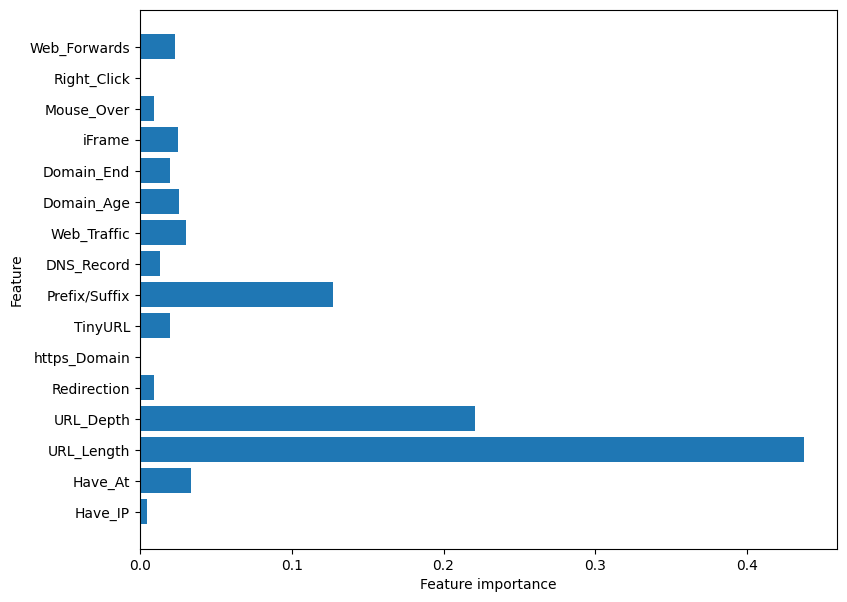

In [ ]:

#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)


top_n_features = feature_importances.head(15).index

# Reduce the training and testing datasets to the top n features
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

# Re-train the Random Forest model on the selected features
forest_selected = RandomForestClassifier(max_depth=15, criterion='gini', random_state=None)
forest_selected.fit(X_train_selected, y_train)


y_train_forest_selected = forest_selected.predict(X_train_selected)
y_test_forest_selected = forest_selected.predict(X_test_selected)

# Compute the accuracy of the model performance
acc_train_forest_selected = accuracy_score(y_train, y_train_forest_selected)
acc_test_forest_selected = accuracy_score(y_test, y_test_forest_selected)

print("Random forest (with selected features): Accuracy on Training Data: {:.3f}".format(acc_train_forest_selected))
print("Random forest (with selected features): Accuracy on Test Data: {:.3f}".format(acc_test_forest_selected))


Random forest (with selected features): Accuracy on Training Data: 0.868
Random forest (with selected features): Accuracy on Test Data: 0.860


In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=15, criterion='gini', random_state=None)

# fit the model
forest.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
#Performance Evaluation:


#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))


Random forest: Accuracy on training Data: 0.869
Random forest: Accuracy on test Data: 0.860


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

Multilayer Perceptrons (MLPs): Deep Learning Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [ ]:
# Multilayer Perceptron model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100))

# fit the model
mlp.fit(X_train, y_train)

# predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
#performance Evaluation:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))



Multilayer Perceptrons: Accuracy on training Data: 0.866
Multilayer Perceptrons: Accuracy on test Data: 0.860


XGBoost Classifier XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(verbosity=1)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3, 0.6, 0.9],
    'max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Re-train with the best parameters
best_xgb = grid_search.best_estimator_

# Predict and evaluate performance
y_train_xgb = best_xgb.predict(X_train)
y_test_xgb = best_xgb.predict(X_test)

acc_train_xgb = accuracy_score(y_train, y_train_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_xgb)

print("XGBoost with best parameters: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost with best parameters: Accuracy on test Data: {:.3f}".format(acc_test_xgb))


Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.9, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.8583746517806805
XGBoost with best parameters: Accuracy on training Data: 0.868
XGBoost with best parameters: Accuracy on test Data: 0.859


Support Vector Machines In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.804
SVM : Accuracy on test Data: 0.792


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

K-Nearest Neighbors (KNN) is a simple, yet powerful, supervised learning algorithm used for both classification and regression tasks. It makes predictions based on the similarity between the data points.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Predict the target values for training and testing data
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

# Compute accuracy of the model
acc_train_knn = accuracy_score(y_train, y_train_knn)
acc_test_knn = accuracy_score(y_test, y_test_knn)

print(f"KNN: Accuracy on Training Data: {acc_train_knn:.3f}")
print(f"KNN: Accuracy on Test Data: {acc_test_knn:.3f}")


KNN: Accuracy on Training Data: 0.849
KNN: Accuracy on Test Data: 0.837


Accuracy


*   Linear Regression: 0.799
*   Logistic Regression: 0.803
*   Decision Tree: 0.860
*   Random forest (with selected features): 0.868
*   Multilayer Perceptrons:  0.866
*   XGBoost with best parameters:  0.87
*   SVM:  0.804
*   KNN:  0.849



XGBoost with best parameters (0.870):

Best performance overall, showing that XGBoost is the most effective model in your dataset. This model likely benefits from advanced hyperparameter tuning and its inherent handling of complex relationships in the data.
XGBoost is typically good for handling imbalanced data and capturing non-linear patterns, which might explain its performance.
Random Forest (0.868):

Close second, showing Random Forest as a strong model, particularly with selected features. It handles feature interactions well and is less prone to overfitting compared to decision trees.
The result suggests that the selected features were well-chosen, as Random Forest performs better with them.
Multilayer Perceptrons (MLP) (0.866):

Similar to Random Forest, MLP gives a high accuracy, implying that a neural network-based model can capture non-linearities in the data.
While it is performing well, it is a bit slower to train and may require tuning of the hidden layers, activation functions, and optimizer for better performance.
Decision Tree (0.860):

Decision Trees also perform well, but are less robust than ensemble methods like Random Forest and XGBoost. Decision trees tend to overfit more, so accuracy can vary if not properly tuned.
KNN (0.849):

KNN performs decently, but it’s slower with large datasets due to its memory-based nature. It doesn’t handle high-dimensional data well unless optimized (using distance metrics, for example). Nevertheless, the accuracy is fairly high and consistent.
Logistic Regression (0.803) and SVM (0.804):

Logistic Regression and SVM provide similar performance, which is good for baseline models but not as effective as the tree-based or boosting models.
Logistic regression assumes a linear relationship, which might limit its predictive power, while SVM is more flexible but still less effective than Random Forest and XGBoost for this dataset.
Linear Regression (0.799):

Linear Regression shows the lowest performance, as it assumes a linear relationship between input features and the output. This is unlikely to capture complex patterns in the data, especially when the relationship between features and target is non-linear.
Its performance is lower than Logistic Regression because Logistic Regression is better suited for classification tasks, whereas Linear Regression is intended for regression tasks.